In [7]:
from wordcloud import WordCloud
import pandas as pd
import os
import sys
import pathlib
import matplotlib.pyplot as plt

In [2]:
# Get current directory
current_dir = os.getcwd()
# Get parent directory
parent_dir = os.path.join(current_dir, '..')
# Append parent directory to sys.path
sys.path.append(parent_dir)

In [3]:
cwd = pathlib.Path.cwd().parent
euans_path = cwd.joinpath('data/processed/aspect classification data/euans_reviews.csv')
google_path = cwd.joinpath('data/processed/aspect classification data/google_reviews.csv')
euans_data = pd.read_csv(euans_path)
google_data = pd.read_csv(google_path)

# Exploratory Data Analysis

In [4]:
wordcloud = WordCloud(background_color='white', max_words=1000, contour_width=3, contour_color='steeleblue')
clustered_reviews_train = ','.join(list(euans_data['Text'].values))
clustered_reviews_test = ','.join(list(google_data['Text'].values))
train_wc = wordcloud.generate(clustered_reviews_train)
train_wc.to_file(cwd.joinpath("reports/figures/euans_word_cloud.png"))
test_wc = wordcloud.generate(clustered_reviews_test)
test_wc.to_file(cwd.joinpath("reports/figures/google_word_cloud.png"))

In [9]:
amount_per_aspect = euans_data.groupby(['Aspect']).count()
amount_per_aspect = amount_per_aspect['Text']

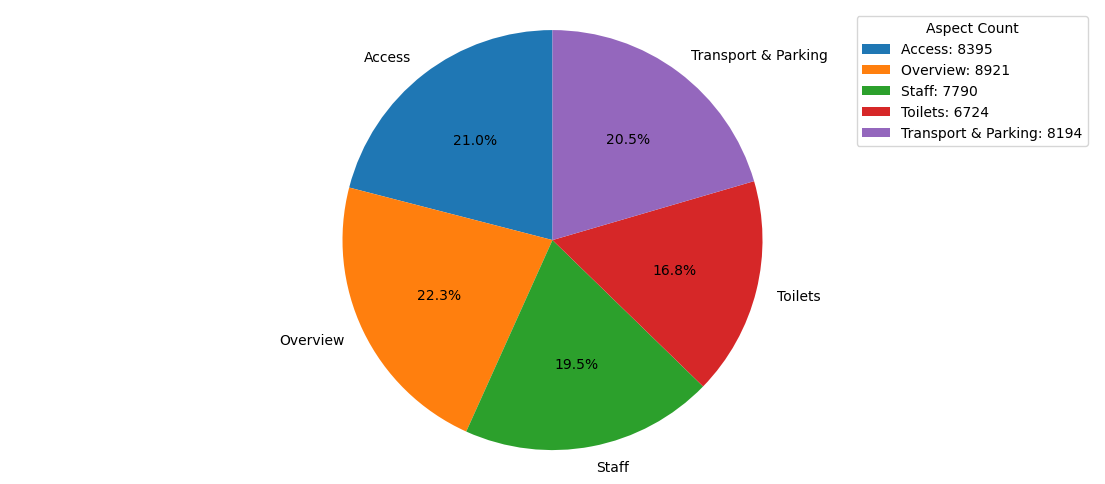

In [15]:
# Create a pie chart of the aspect counts
fig, ax = plt.subplots(figsize=(14, 6))
labels = amount_per_aspect.index
sizes = amount_per_aspect.values
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Add a legend with the aspect counts
legend_labels = [f"{label}: {size}" for label, size in zip(labels, sizes)]
ax.legend(legend_labels, title="Aspect Count", loc="best")

# Set the file path to save the plot to
aspects_file_path = cwd.joinpath("reports/figures/euans_aspects_amounts_piechart_with_stats.png")

# Save the plot to the file path
plt.savefig(aspects_file_path, bbox_inches='tight')

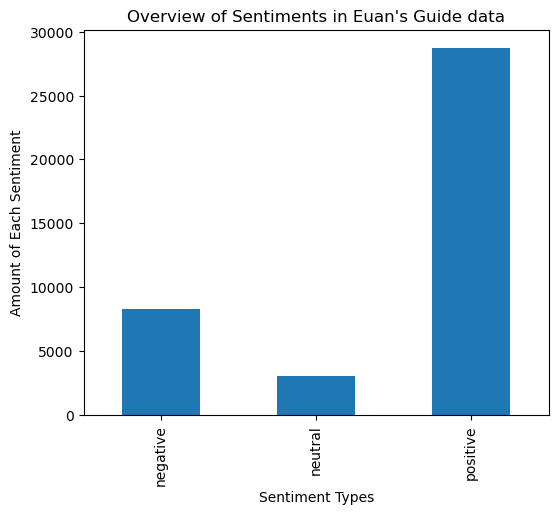

In [16]:
amount_per_sentiment = euans_data.groupby(['Sentiment']).count()
amount_per_sentiment = amount_per_sentiment['Text']
plot = amount_per_sentiment.plot(kind='bar', title="Overview of Sentiments in Euan's Guide data", ylabel='Amount of Each Sentiment', xlabel='Sentiment Types', figsize=(6,5))

# Set the file path to save the plot to
sentiment_file_path = cwd.joinpath("reports/figures/euans_sentiment_count.png")

# Save the plot to the file path
plot.get_figure().savefig(sentiment_file_path)
